In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [49]:
#datos
x = np.array([-20,-18,-16,14,-10,-6,-4,-2,2,3,4,6,12,14,16,18,20])*np.pi/15
y = np.array([ 495,  496, 496,  497,  498, 499, 499, 500, 500, 499, 499.89, 499.64,  498.27,  497.61,  496.85,
  496.00,  495.04])

In [50]:
def residuals(p, y, x):
 A, k, theta = p #los parámetros que queremos conseguir
 err = y - (A * (np.sin(k*x)/(k*x))**2+ theta) #la función que queremos ajustar, nos interesa k
 return err

def peval(x, p):
 return p[0] * (np.sin(p[1]*x)/(p[1]*x))**2+ p[2]

p0 = np.array([40,0.5,100]) #parámetros A,k, theta semillas para que arranque a fitear

plsq = leastsq(residuals, p0, args=(y, x)) #optimización de esos parámetros

In [51]:
print(plsq[0]) #Estos son los valores A, k y theta que se obtienen luego del ajuste

[  1.44961323e+01   2.52074574e-01   4.85225479e+02]


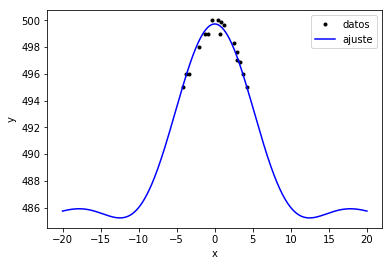

In [52]:
plt.plot(x,y,'.k',label='datos')
x_ajuste = np.linspace(-20,20,1000) #para que el ajuste sea en un "continuo"
plt.plot(x_ajuste, peval(x_ajuste,plsq[0]),'b',label='ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('figuraa.jpg',dpi=400)
plt.show()